In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



df=pd.read_csv(r'C:\Users\avgjo\datathon\mobility_services.csv')
df.head()


,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457.0,49.170948,1.0,bike,Clear,63.0,0.0
1,NaN,90.000000,NaN,30.000000,NaN,car,Clear,NaN,NaN
2,NaN,41.197085,NaN,39.110219,NaN,auto,Clear,NaN,NaN
3,2021-01-01 01:00:00,20.772227,141.0,30.000000,1.5,bike,Stormy,83.0,0.0
4,NaN,90.969805,NaN,30.000000,NaN,NaN,Clear,NaN,NaN


In [34]:
#Q1: classification of data
data_types={
    'timestamp':'Interval',
    'average_fare':'ratio',
    'rides_completed':'ratio',
    'driver_availability':'ratio',
    'surge_multiplier':'ratio',
    'vehicle_type':'nominal',
    'weather':'nominal',
    'traffic_index':'ratio',
    'special_event':'ordinal',
}
print("Data classification:\n",data_types,"\n")
print("Missing values in everycolumn:\n",df.isnull().sum())

'''INSIGHTS:
timestamp: Interval - Time is an interval variable as it has no true zero point but differences between timestamps are meaningful.
average_fare: Ratio - Represents a fare amount with a true zero (no cost) and allows for meaningful ratios 
rides_completed: Ratio - Count of rides, with a true zero point (no rides) and meaningful ratios 
driver_availability: Ratio - A percentage metric ranging from 0 to 100, where zero indicates no availability and 100 full availability, making ratios meaningful.
surge_multiplier: Ratio - A fare multiplier, with a true zero point (no surge), and meaningful ratios 
vehicle_type: Nominal - Categorical data with no inherent ordering  vehicle types are simply different labels.
weather: Nominal - Categorical and unordered, representing different weather conditions (e.g., Clear, Cloudy, Stormy) without any ranking.
traffic_index: Ratio - Represents a numerical level of traffic with a true zero (no traffic), and comparisons between values are meaningful.
special_event: Nominal/Binary - Indicates the presence or absence of a special event, coded as binary (1 or 0), with no inherent order.
'''

Data classification:
 {'timestamp': 'Interval', 'average_fare': 'ratio', 'rides_completed': 'ratio', 'driver_availability': 'ratio', 'surge_multiplier': 'ratio', 'vehicle_type': 'nominal', 'weather': 'nominal', 'traffic_index': 'ratio', 'special_event': 'ordinal'} 

Missing values in everycolumn:
 timestamp              2798
average_fare              0
rides_completed        2798
driver_availability       1
surge_multiplier       2799
vehicle_type           2685
weather                   1
traffic_index          2799
special_event          2799
dtype: int64


In [36]:
#Q2
print(df.info())
print(df.describe())
missing_values=df.isnull().sum()
print("missing values:\n",missing_values)
df.dropna(inplace=True)
duplicates=df.duplicated().sum()
print("duplicates after dropping:\n",df.duplicated().sum())
df['timestamp']=pd.to_datetime(df['timestamp'])

'''INSIGHTS: understanding data Structure: By using .info() and .describe(), we understand the column data types and numerical summaries.
Handling Missing Values: By checking and dropping missing values, the dataset becomes complete, which is essential for analysis/modeling.
Removing Duplicates: Ensures data integrity by eliminating any redundant rows that could skew results.
Datetime Conversion: Prepares timestamp for time-based analysis, enabling insights from temporal trends in the data.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13823 entries, 0 to 13822
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            11025 non-null  object 
 1   average_fare         13823 non-null  float64
 2   rides_completed      11025 non-null  float64
 3   driver_availability  13822 non-null  float64
 4   surge_multiplier     11024 non-null  float64
 5   vehicle_type         11138 non-null  object 
 6   weather              13822 non-null  object 
 7   traffic_index        11024 non-null  float64
 8   special_event        11024 non-null  float64
dtypes: float64(6), object(3)
memory usage: 972.1+ KB
None
       average_fare  rides_completed  driver_availability  surge_multiplier  \
count  13823.000000     11025.000000         13822.000000      11024.000000   
mean      55.085970       497.502585            44.743392          1.255244   
std       31.409583       414.491903          

In [38]:
#Q3: measures of central tendency sd and range
summary_stats = df.describe()
numeric_df = df.select_dtypes(include=[np.number])
central_tendency = numeric_df.median()  
range_values = numeric_df.max() - numeric_df.min()
std_dev = numeric_df.std()

print("Summary statistics:\n", summary_stats)
print("Central tendency (median):\n", central_tendency)
print("Range of values:\n", range_values)
print("SD:\n", std_dev)

'''INSIGHTS:This code calculates summary statistics, including median, range, and standard deviation, for numeric columns. The median indicates typical values, unaffected by outliers. The range shows the spread of values, while standard deviation measures variability around the mean. Together, these metrics provide insights into data distribution, central tendency, and variability.'''

Summary statistics:
                            timestamp  average_fare  rides_completed  \
count                           8865   8865.000000      8865.000000   
mean   2021-04-07 08:38:01.015228672     55.115037       498.437225   
min              2021-01-01 00:00:00     20.000000        10.000000   
25%              2021-02-18 06:00:00     28.284138       181.000000   
50%              2021-04-07 19:00:00     40.018482       362.000000   
75%              2021-05-26 05:00:00     94.089422       727.000000   
max              2021-07-11 23:00:00    111.637066      2546.000000   
std                              NaN     31.466710       415.163449   

       driver_availability  surge_multiplier  traffic_index  special_event  
count          8865.000000       8865.000000    8865.000000    8865.000000  
mean             44.710347          1.254927      59.528257       0.106937  
min              30.000000          1.000000      20.000000       0.000000  
25%              30.000000     

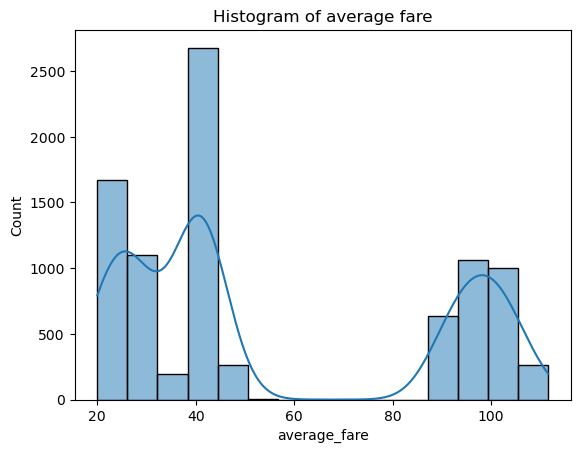

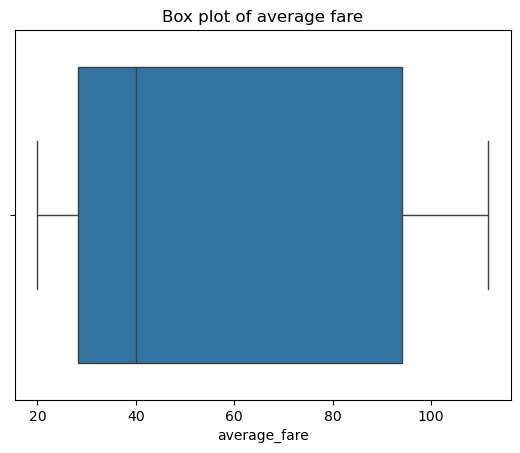

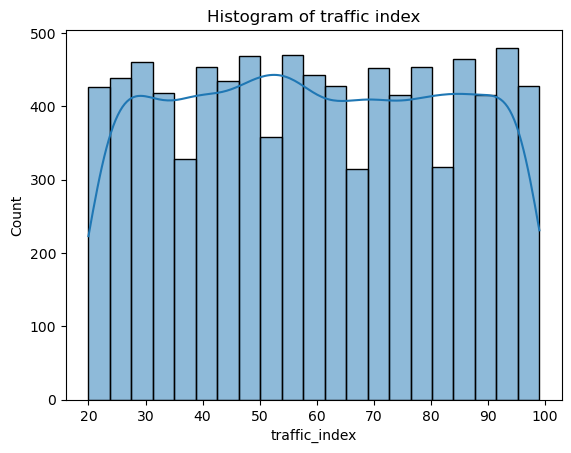

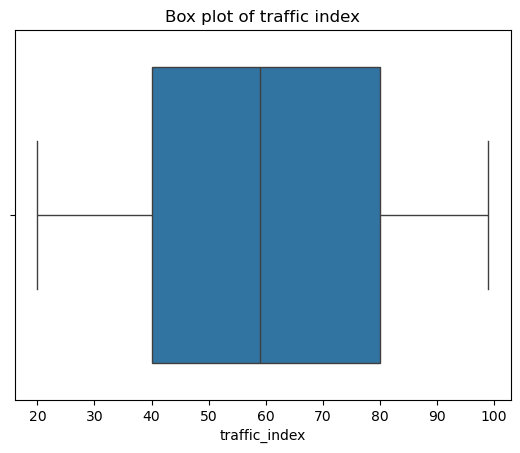

In [40]:
#Q4: plotting histogram and box plot for avg fare and traffic index
sns.histplot(df['average_fare'], kde=True)
plt.title("Histogram of average fare")
plt.show()
sns.boxplot(x=df['average_fare'])
plt.title("Box plot of average fare")
plt.show()
sns.histplot(df['traffic_index'], kde=True)
plt.title("Histogram of traffic index")
plt.show()
sns.boxplot(x=df['traffic_index'])
plt.title("Box plot of traffic index")
plt.show()

'''INSIGHTS: These visualizations reveal data distribution, skewness, and outliers, helping us understand central tendencies and variability for both variables.'''

In [41]:
#Q5: identifying and counting outliers in average_fare and traffic_index using IQR method
def countoutliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return len(outliers)

outliersfare = countoutliers('average_fare')
outlierstraffic = countoutliers('traffic_index')
print("Outliers in Average Fare:", outliersfare)
print("Outliers in Traffic Index:", outlierstraffic)
'''INSIGHTS: Outliers in Average Fare: The count of outliers shows how many fare values are unusually high or low, which may represent extreme fare variations.
Outliers in Traffic Index: Similarly, the count indicates unusual traffic levels, highlighting periods with significantly different traffic conditions. '''

Outliers in Average Fare: 0
Outliers in Traffic Index: 0


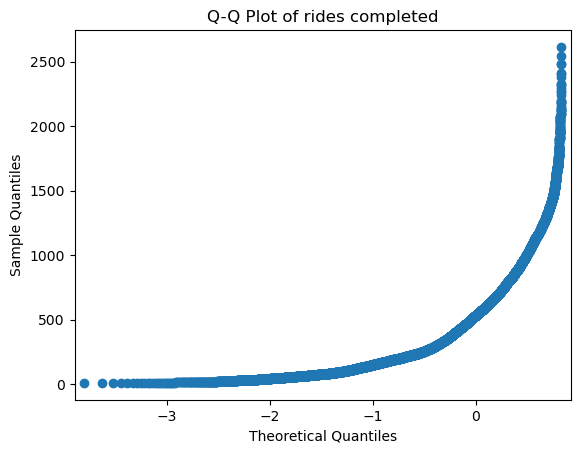

In [46]:
#6 Q-Qplot for 'rides completed'
qqplot(df['rides_completed'], line='s')
plt.title("Q-Q Plot of rides completed")
plt.show()
'''INSIGHTS: 6.
A Q-Q Plot is used to check if a variable's distribution (e.g., rides_completed) is normal.
qqplot() 
Function:Using qqplot() from statsmodels, we plot data quantiles against standard normal quantiles. The argument df['rides_completed'] specifies the data, and line='s' adds a reference line for comparison.
Interpretation:If the points align with the line, the data is likely normal. Deviations suggest non-normality, which could affect analyses assuming normality.'''

In [48]:
#Q7: correlation matrix and identifying the highest correlation with 'driver_availability'
numericdf = df.select_dtypes(include=[np.number])
correlationmatrix = numericdf.corr()
highest_corr_with_driver = correlationmatrix['driver_availability'].sort_values(ascending=False).iloc[1]
print("Correlation Matrix:\n", correlationmatrix)
print("Highest correlation with 'driver_availability':", highest_corr_with_driver)
'''INSIGHTS: 7.A Correlation Matrix shows how numerical variables are related. Using corr(), it calculates Pearson correlations for all numeric columns, and select_dtypes() ensures only numeric data is included.

To find the strongest correlation with driver_availability, we sort the correlations and pick the highest (excluding the self-correlation). This identifies the feature most closely linked to driver availability.'''

Correlation Matrix:
                      average_fare  rides_completed  driver_availability  \
average_fare             1.000000        -0.675228            -0.550927   
rides_completed         -0.675228         1.000000             0.788917   
driver_availability     -0.550927         0.788917             1.000000   
surge_multiplier        -0.021434         0.055555             0.032513   
traffic_index            0.003135        -0.211467            -0.215361   
special_event           -0.000406         0.011050             0.014138   

                     surge_multiplier  traffic_index  special_event  
average_fare                -0.021434       0.003135      -0.000406  
rides_completed              0.055555      -0.211467       0.011050  
driver_availability          0.032513      -0.215361       0.014138  
surge_multiplier             1.000000       0.350895       0.473118  
traffic_index                0.350895       1.000000      -0.014888  
special_event                0.47

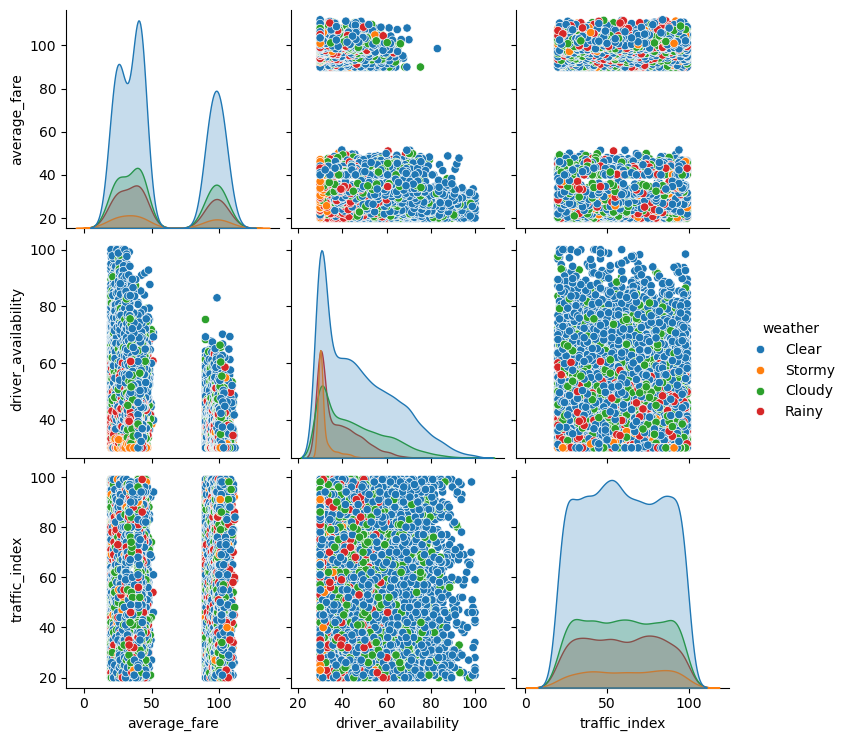

In [51]:
#Q8: pairplot with 'weather' as hue, only using numeric variables finding vehicle type
sns.pairplot(df, vars=['average_fare', 'driver_availability', 'traffic_index'], hue='weather')
plt.show()
'''INSIGHTS:A Pair Plot is a grid of scatter plots that shows relationships between multiple variables.The pair plot helps identify trends, clusters, and outliers, revealing if weather affects fare and driver availability.'''

T-test Results:
T-statistic: -600.9276860404597 
P-value: 0.0


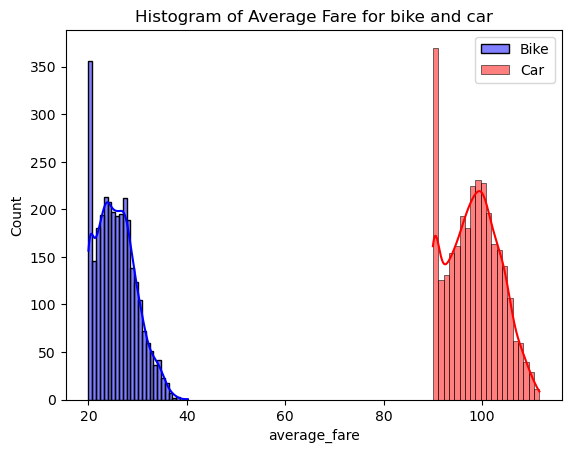

'INSIGHTS:\nHypothesis Test (T-test):\nNull Hypothesis (H₀): No significant difference in average fare between bikes and cars.\nAlternative Hypothesis (H₁): A significant difference in average fare between bikes and cars.  Visualization: Histograms of bike and car fares help visually compare fare distributions.'

In [11]:
# Q9: Hypothesis testing (T-test) on average_fare between bike and car
bikefare = df[df['vehicle_type'] == 'bike']['average_fare']
carfare = df[df['vehicle_type'] == 'car']['average_fare']

t_stat, p_val = stats.ttest_ind(bikefare, carfare)
print("T-test Results:\nT-statistic:", t_stat, "\nP-value:", p_val)

sns.histplot(bikefare, color='blue', label='Bike', kde=True)
sns.histplot(carfare, color='red', label='Car', kde=True)
plt.legend()
plt.title("Histogram of Average Fare for bike and car")
plt.show()

'''INSIGHTS:
Hypothesis Test (T-test):
Null Hypothesis (H₀): No significant difference in average fare between bikes and cars.
Alternative Hypothesis (H₁): A significant difference in average fare between bikes and cars.  Visualization: Histograms of bike and car fares help visually compare fare distributions.'''

In [57]:
# Q10: Calculate margin of error(MOE)
marginerror = stats.sem(bikefare - carfare) * stats.t.ppf((1 + 0.95) / 2, len(bikefare) - 1)
print("Margin of Error:", marginerror)
'''INSIGHTS:
Margin of Error: It shows the precision of our hypothesis test and gives a range for the true mean difference between bike and car fares.
Standard Error of the Mean (SEM): Calculated with stats.sem() to find the standard error for the fare differences.
T-distribution Critical Value: stats.t.ppf() calculates the critical value for a 95% confidence interval. The formula (1 + 0.95) / 2 gives 97.5%, which is the two-tailed critical value for a 95% confidence level. The degrees of freedom are based on the sample size of bike fares (len(bike_fare) - 1).
Interpretation: A smaller margin of error indicates a more precise estimate of the fare difference between bikes and cars.'''

Margin of Error: nan


Mean Squared Error (MSE): 51112.00
Root Mean Squared Error (RMSE): 226.08
R-squared (R^2): 0.73


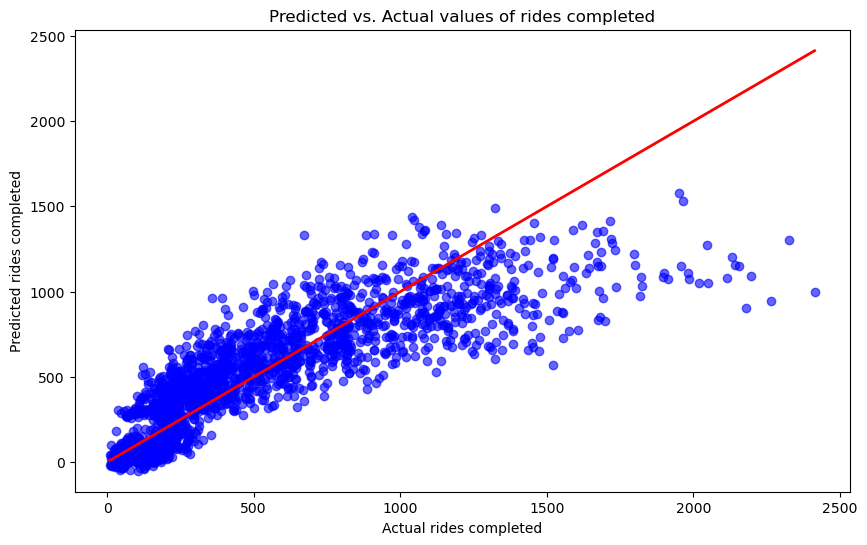

In [9]:
#Q11: import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df = pd.read_csv('mobility_services.csv')
df = df.dropna(subset=['rides_completed', 'average_fare', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event'])


X = df[['average_fare', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
y = df['rides_completed']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(Xtrain, ytrain)


ypred = model.predict(Xtest)


mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linewidth=2)  # y=x line for reference
plt.xlabel('Actual rides completed')
plt.ylabel('Predicted rides completed')
plt.title('Predicted vs. Actual values of rides completed')
plt.show()

'''INSIGHTS: 
Margin of Error: Shows how precise our estimate is for the fare difference between bikes and cars.
SEM: Calculates the standard error of fare differences.
Critical Value: Uses stats.t.ppf() for the 95% confidence interval.
Interpretation: A smaller margin of error means a more precise estimate of the difference.'''

In [7]:
# Q12: Suggestions for feature aggregations
df['fare_per_ride'] = df['average_fare'] / df['rides_completed']
df['adjusted_traffic'] = df['traffic_index'] * df['driver_availability']
print("New aggregated features:\n", df[['fare_per_ride', 'adjusted_traffic']].head())
'''INSIGHTS:
Vehicle Category Fare Averages by Time Period: By taking the average fare by time of day or on a weekly basis for each of the vehicle types—bike, car, auto—we get a sense of fare trends, which would tell us about patterns; perhaps car rides are more expensive at night or maybe bike fares decrease on the weekend.
Availability of Driver Adjusted for Condition: Of course, by including in our measure of driver availability the external conditions themselves, such as traffic index and weather, we can continue improving it. This will give rise to metrics that are more context-aware, meaning driver availability data can be more relevant and informative.'''

New aggregated features:
    fare_per_ride  adjusted_traffic
0       0.045471       3097.769732
1            NaN               NaN
2            NaN               NaN
3       0.147321       2490.000000
4            NaN               NaN
